# CNC Milling Tool Wear - CaseStudy

## 0. About Dataset

### Context
A series of machining experiments were run on 2" x 2" x 1.5" wax blocks in a CNC milling machine in the System-level Manufacturing and Automation Research Testbed (SMART) at the University of Michigan. Machining data was collected from a CNC machine for variations of tool condition, feed rate, and clamping pressure. Each experiment produced a finished wax part with an "S" shape - S for smart manufacturing - carved into the top face, as shown in test_artifact.jpg (included in the dataset).

### Content
General data from each of the 18 different experiments are given in train.csv and includes the experiment number, material (wax), feed rate, and clamp pressure. Outputs per experiment include tool condition (unworn and worn tools) and whether or not the tool passed visual inspection.

Time series data was collected from the 18 experiments with a sampling rate of 100 ms and are separately reported in files experiment_01.csv to experiment_18.csv. Each file has measurements from the 4 motors in the CNC (X, Y, Z axes and spindle). These CNC measurements can be used in two ways:

1. Taking every CNC measurement as an independent observation where the operation being performed is given in the Machining_Process column. Active machining operations are labeled as "Layer 1 Up", "Layer 1 Down", "Layer 2 Up", "Layer 2 Down", "Layer 3 Up", and "Layer 3 Down".
2. Taking each one of the 18 experiments (the entire time series) as an observation for time series classification

Note that some variables will not accurately reflect the operation of the CNC machine. This can usually be detected by when M1_CURRENT_FEEDRATE reads 50, when X1 ActualPosition reads 198, or when M1_CURRENT_PROGRAM_NUMBER does not read 0. The source of these errors has not been identified.


### Acknowledgements
This data was extracted using the Rockwell Cloud Collector Agent Elastic software from a CNC milling machine in the System-level Manufacturing and Automation Research Testbed (SMART) at the University of Michigan.

### Inspiration

The dataset can be used in classification studies such as:

1. **Tool wear detection** : Supervised binary classification could be performed for identification of worn and unworn cutting tools. Eight experiments were run with an unworn tool while ten were run with a worn tool (see tool_condition column for indication).
2. **Detection of inadequate clamping** : The data could be used to detect when a workpiece is not being held in the vise with sufficient pressure to pass visual inspection (see passed_visual_inspection column for indication of visual flaws). Experiments were run with pressures of 2.5, 3.0, and 4.0 bar. The data could also be used for detecting when conditions are critical enough to prevent the machining operation from completing (see machining_completed column for indication of when machining was preemptively stopped due to safety concerns).

In [1]:
#importing some basic libraries which are commonly used for data science

import pandas as pd    #Pandas Library to work on tabular data
import numpy as np     #Numerical Python Library to use mathematical functions
import matplotlib.pyplot as plt    #Mathematical plotting library
import seaborn as sns    #Visualization Library Seaborn
import os   # OS library to read path of this file, etc.

# Setting options for the Pandas library to display all columns and rows in the dataset if required
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# This line of code is to display the charts within the Jupyter Notebook
%matplotlib inline

General data from a total of 18 different experiments are given in train.csv and includes:

**Inputs (features)**

No : experiment number

*   material : wax
*   feed_rate : relative velocity of the cutting tool along the workpiece (mm/s)
* clamp_pressure : pressure used to hold the workpiece in the vise (bar)

**Outputs (predictions)**

* tool_condition : label for unworn and worn tools
* machining_completed : indicator for if machining was completed without the workpiece moving out of the pneumatic vise
* passed_visual_inspection: indicator for if the workpiece passed visual inspection, only available for experiments where machining was completed

<br>
Time series data was collected from 18 experiments with a sampling rate of 100 ms and are separately reported in files experiment_01.csv to experiment_18.csv. Each file has measurements from the 4 motors in the CNC (X, Y, Z axes and spindle). These CNC measurements can be used in two ways:

1. Taking every CNC measurement as an independent observation where the operation being performed is given in the Machining_Process column. Active machining operations are labeled as "Layer 1 Up", "Layer 1 Down", "Layer 2 Up", "Layer 2 Down", "Layer 3 Up", and "Layer 3 Down".

2. Taking each one of the 18 experiments (the entire time series) as an observation for time series classification


**The features available in the machining datasets are:**
* X1_ActualPosition: actual x position of part (mm)
* X1_ActualVelocity: actual x velocity of part (mm/s)
* X1_ActualAcceleration: actual x acceleration of part (mm/s/s)
* X1_CommandPosition: reference x position of part (mm)
* X1_CommandVelocity: reference x velocity of part (mm/s)
* X1_CommandAcceleration: reference x acceleration of part (mm/s/s)
* X1_CurrentFeedback: current (A)
* X1_DCBusVoltage: voltage (V)
* X1_OutputCurrent: current (A)
* X1_OutputVoltage: voltage (V)
* X1_OutputPower: power (kW)
  
   
* Y1_ActualPosition: actual y position of part (mm)
* Y1_ActualVelocity: actual y velocity of part (mm/s)
* Y1_ActualAcceleration: actual y acceleration of part (mm/s/s)
* Y1_CommandPosition: reference y position of part (mm)
* Y1_CommandVelocity: reference y velocity of part (mm/s)
* Y1_CommandAcceleration: reference y acceleration of part (mm/s/s)
* Y1_CurrentFeedback: current (A)
* Y1_DCBusVoltage: voltage (V)
* Y1_OutputCurrent: current (A)
* Y1_OutputVoltage: voltage (V)
* Y1_OutputPower: power (kW)  
  

* Z1_ActualPosition: actual z position of part (mm)
* Z1_ActualVelocity: actual z velocity of part (mm/s)
* Z1_ActualAcceleration: actual z acceleration of part (mm/s/s)
* Z1_CommandPosition: reference z position of part (mm)
* Z1_CommandVelocity: reference z velocity of part (mm/s)
* Z1_CommandAcceleration: reference z acceleration of part (mm/s/s)
* Z1_CurrentFeedback: current (A)
* Z1_DCBusVoltage: voltage (V)
* Z1_OutputCurrent: current (A)
* Z1_OutputVoltage: voltage (V)
  

* S1_ActualPosition: actual position of spindle (mm)
* S1_ActualVelocity: actual velocity of spindle (mm/s)
* S1_ActualAcceleration: actual acceleration of spindle (mm/s/s)
* S1_CommandPosition: reference position of spindle (mm)
* S1_CommandVelocity: reference velocity of spindle (mm/s)
* S1_CommandAcceleration: reference acceleration of spindle (mm/s/s)
* S1_CurrentFeedback: current (A)
* S1_DCBusVoltage: voltage (V)
* S1_OutputCurrent: current (A)
* S1_OutputVoltage: voltage (V)
* S1_OutputPower: current (A)
* S1_SystemInertia: torque inertia (kg*m^2)
  

* M1_CURRENT_PROGRAM_NUMBER: number the program is listed under on the CNC
* M1_sequence_number: line of G-code being executed
* M1_CURRENT_FEEDRATE: instantaneous feed rate of spindle
  


**Machining_Process:** the current machining stage being performed. Includes preparation, tracing up  and down the "S" curve involving different layers, and repositioning of the spindle as it moves through the air to a certain starting point


**Note:** Some variables will not accurately reflect the operation of the CNC machine. This can usually be detected by when M1_CURRENT_FEEDRATE reads 50, when X1 ActualPosition reads 198, or when M1_CURRENT_PROGRAM_NUMBER does not read 0. The source of these errors has not been identified.


## 1. Data Collection : Importing the data

In [2]:
# importing the data from Kaggle
# We will simply downlaod the dataset from the Kaggle website and place it in an accessible location
# https://www.kaggle.com/datasets/shasun/tool-wear-detection-in-cnc-mill?resource=download

#Running these below statement to mount my Google Drive on Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = "/content/drive/MyDrive/Work/RevaCollegePresentation/CNC_Milling_Dataset"

In [4]:
from pathlib import Path
df_list=[]
for path in Path(data_path).iterdir():
    if path.suffix ==".csv" and path.name!="train.csv":
        exp_data = pd.read_csv(str(path))
        df_list.append(exp_data)
all_exp_data = pd.concat(df_list)

In [5]:
print(all_exp_data.shape)

(25286, 48)


In [6]:
#let's look at a sample of the data
all_exp_data.head()  #shows top 5 rows of the data

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,141.0,-0.200,-100.0,141.0,0.0,0.0,-2.450,0.0512,327.0,2.69,0.000030,96.6,6.05,-75.0,96.7,6.0,0.0,2.72,0.0578,326.0,12.7,0.000714,29.7,0.025,6.25,29.7,0.0,0.0,0.0,0.0,0.0,0.0,-1540.0,53.4,45.30,-1540.0,53.3,0.000000e+00,18.7,0.765,323.0,115.0,0.145,12.0,1.0,2.0,6.0,Prep
1,141.0,-0.300,-144.0,141.0,0.0,0.0,-1.400,0.0479,327.0,3.18,0.000014,97.2,6.28,18.8,97.3,6.0,0.0,2.93,0.0756,326.0,12.4,0.000893,29.7,0.025,12.50,29.7,0.0,0.0,0.0,0.0,0.0,0.0,-1530.0,53.3,11.90,-1530.0,53.3,0.000000e+00,24.8,1.000,322.0,117.0,0.193,12.0,1.0,26.0,6.0,Prep
2,141.0,-0.250,-131.0,141.0,0.0,0.0,-2.290,0.0483,327.0,2.10,0.000015,97.8,6.10,68.7,97.9,6.0,0.0,4.96,0.1080,325.0,14.0,0.001380,29.7,0.025,12.50,29.7,0.0,0.0,0.0,0.0,0.0,0.0,-1530.0,53.4,14.10,-1530.0,53.3,0.000000e+00,17.8,0.881,323.0,114.0,0.170,12.0,1.0,26.0,6.0,Prep
3,141.0,-0.175,-93.7,141.0,0.0,0.0,-0.851,0.0488,327.0,4.08,0.000007,98.4,5.97,-12.5,98.5,6.0,0.0,5.71,0.1140,326.0,14.8,0.001470,29.7,-0.025,-6.25,29.7,0.0,0.0,0.0,0.0,0.0,0.0,-1520.0,53.3,-16.10,-1520.0,53.3,9.540000e-07,21.5,0.751,323.0,117.0,0.144,12.0,1.0,26.0,6.0,Prep
4,141.0,-0.200,-106.0,141.0,0.0,0.0,-2.290,0.0502,327.0,2.17,0.000015,99.0,5.93,-75.0,99.1,6.0,0.0,6.06,0.1080,325.0,14.5,0.001300,29.7,0.000,0.00,29.7,0.0,0.0,0.0,0.0,0.0,0.0,-1520.0,53.3,-7.06,-1520.0,53.3,-9.540000e-07,21.6,0.989,322.0,115.0,0.190,12.0,1.0,26.0,6.0,Prep


In [7]:
all_exp_data.tail()   #shows last 5 rows of the data

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
2327,165.0,-17.9,37.50,165.0,-17.9,-0.000095,-5.43,0.108,329.0,28.3,0.00408,98.6,-32.3,-62.5,98.3,-32.4,0.000000,-11.40,0.190,326.0,49.5,0.0131,57.2,-33.6,-12.50,57.0,-33.6,0.0,0.0,0.0,0.0,0.0,42.0,0.000,-0.25,42.0,0.0,0.0,0.40800,2.700000e-19,329.0,0.0,-0.000001,12.0,1.0,7.0,50.0,End
2328,163.0,-18.1,-6.25,163.0,-17.9,0.000000,-4.77,0.107,329.0,30.0,0.00389,95.3,-32.6,-87.5,95.1,-32.4,0.000000,-11.20,0.177,326.0,49.2,0.0120,53.9,-33.7,-18.80,53.6,-33.6,0.0,0.0,0.0,0.0,0.0,42.0,0.000,-0.25,42.0,0.0,0.0,0.00499,2.700000e-19,329.0,0.0,-0.000002,12.0,1.0,7.0,50.0,End
2329,162.0,-18.1,-81.20,161.0,-17.9,0.000000,-5.61,0.104,328.0,30.3,0.00387,92.1,-32.3,50.0,91.8,-32.4,-0.000095,-8.07,0.185,326.0,50.7,0.0128,50.5,-33.6,25.00,50.3,-33.6,0.0,0.0,0.0,0.0,0.0,42.0,-0.002,-0.50,42.0,0.0,0.0,-0.08760,2.700000e-19,329.0,0.0,0.000001,12.0,1.0,7.0,50.0,End
2330,160.0,-18.0,-6.25,160.0,-17.9,0.000000,-7.79,0.134,328.0,30.3,0.00508,88.9,-32.6,-62.5,88.6,-32.4,0.000095,-6.61,0.154,326.0,49.3,0.0106,47.2,-33.6,18.80,46.9,-33.6,0.0,0.0,0.0,0.0,0.0,42.0,0.002,0.50,42.0,0.0,0.0,-0.27300,2.700000e-19,329.0,0.0,-0.000003,12.0,1.0,7.0,50.0,End
2331,158.0,-17.8,25.00,158.0,-17.9,0.000191,-8.14,0.138,328.0,29.6,0.00521,85.6,-32.3,62.5,85.4,-32.4,0.000000,-9.99,0.162,326.0,51.0,0.0109,43.8,-33.8,6.25,43.5,-33.6,0.0,0.0,0.0,0.0,0.0,42.0,0.001,0.50,42.0,0.0,0.0,-0.47500,2.700000e-19,329.0,0.0,-0.000002,12.0,1.0,7.0,50.0,End


In [8]:
all_exp_data.sample(10)   #shows sample n rows of the data

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
76,155.0,-2.920,31.30,154.0,-3.00,0.000,-3.51,0.0684,327.0,10.70,0.000422,72.4,0.125,50.00,72.4,0.000,0.00,-1.770,0.0487,326.0,5.56,-7.000000e-06,29.7,0.000,0.00,29.7,0.0,0.0,0.0,0.0,0.0,0.0,-1190.0,53.4,21.60,-1190.0,53.3,-9.540000e-07,18.8,0.830,321.0,120.0,0.160,12.0,1.0,45.0,3.0,Prep
400,162.0,0.175,87.50,162.0,0.00,0.000,1.66,0.0494,325.0,3.32,0.000000,102.0,-6.250,-56.30,102.0,-6.000,0.00,-3.120,0.1050,324.0,15.10,1.350000e-03,27.7,0.025,12.50,27.7,0.0,0.0,0.0,0.0,0.0,0.0,-666.0,53.4,46.60,-666.0,53.3,0.000000e+00,11.7,0.915,321.0,124.0,0.174,12.0,1.0,112.0,6.0,Layer 1 Down
372,162.0,-2.920,-12.50,162.0,-3.00,0.000,-4.55,0.0819,327.0,11.50,0.000479,99.8,-0.025,-12.50,99.8,0.000,0.00,-0.685,0.0143,326.0,2.43,3.190000e-08,29.5,0.000,0.00,29.5,0.0,0.0,0.0,0.0,0.0,0.0,89.7,53.4,35.40,90.1,53.3,-9.540000e-07,17.6,0.750,324.0,117.0,0.143,12.0,1.0,33.0,3.0,Layer 1 Up
55,148.0,-3.130,25.00,148.0,-2.96,0.366,-4.57,0.0813,327.0,7.74,0.000512,103.0,-0.375,31.30,103.0,-0.489,-2.24,-5.860,0.1050,325.0,7.13,8.480000e-05,27.5,0.000,0.00,27.5,0.0,0.0,0.0,0.0,0.0,0.0,878.0,53.2,-64.90,879.0,53.3,9.540000e-07,25.1,0.881,320.0,118.0,0.167,12.0,1.0,119.0,3.0,Layer 1 Up
793,161.0,2.250,0.00,161.0,2.29,-2.210,4.13,0.0685,327.0,6.78,0.000347,91.0,-1.880,12.50,91.0,-1.940,-2.63,-5.670,0.1060,325.0,9.31,3.940000e-04,28.7,0.025,12.50,28.7,0.0,0.0,0.0,0.0,0.0,0.0,-132.0,53.5,64.60,-131.0,53.3,0.000000e+00,13.5,0.737,318.0,116.0,0.139,12.0,1.0,81.0,3.0,Repositioning
1834,160.0,-3.130,-6.25,160.0,-2.97,-0.459,-3.64,0.0864,327.0,7.99,0.000537,72.4,-0.400,6.25,72.4,-0.393,3.41,-6.880,0.1260,325.0,7.06,1.410000e-04,27.5,0.025,12.50,27.5,0.0,0.0,0.0,0.0,0.0,0.0,1750.0,53.3,6.81,1750.0,53.3,0.000000e+00,22.6,1.050,318.0,116.0,0.204,12.0,1.0,126.0,3.0,Layer 3 Down
1593,141.0,0.000,6.25,141.0,0.00,0.000,-2.29,0.0429,327.0,5.95,-0.000034,97.0,2.920,-18.80,97.0,3.000,0.00,6.760,0.1070,326.0,10.80,6.920000e-04,28.5,-0.025,-12.50,28.5,0.0,0.0,0.0,0.0,0.0,0.0,683.0,53.4,2.50,684.0,53.3,-9.540000e-07,17.2,0.863,323.0,115.0,0.164,12.0,1.0,2.0,3.0,Repositioning
1794,159.0,1.230,-25.00,159.0,1.16,-2.090,7.34,0.0988,327.0,3.02,0.000314,76.9,2.900,6.25,76.9,2.770,0.88,3.530,0.0561,326.0,6.60,3.330000e-04,28.7,0.025,6.25,28.7,0.0,0.0,0.0,0.0,0.0,0.0,-37.2,53.4,48.30,-36.7,53.3,-9.540000e-07,17.8,0.913,318.0,118.0,0.175,12.0,1.0,62.0,3.0,Layer 3 Up
16,158.0,-1.900,-43.80,158.0,-1.89,-1.760,-1.94,0.0498,327.0,8.10,0.000173,88.0,2.400,-12.50,88.1,2.330,-1.43,2.830,0.0522,326.0,7.58,2.460000e-04,29.7,0.000,0.00,29.7,0.0,0.0,0.0,0.0,0.0,0.0,1250.0,53.2,-35.40,1260.0,53.3,9.540000e-07,23.8,0.862,324.0,120.0,0.165,12.0,1.0,22.0,3.0,Prep
1001,161.0,4.200,25.00,162.0,3.88,-10.500,4.59,0.0875,325.0,9.02,0.000748,90.7,-4.300,-37.50,90.7,-4.580,-8.93,-6.880,0.1220,324.0,13.10,1.130000e-03,27.7,0.025,12.50,27.7,0.0,0.0,0.0,0.0,0.0,0.0,-229.0,53.3,-24.40,-229.0,53.3,0.000000e+00,23.5,1.020,316.0,113.0,0.198,12.0,1.0,122.0,6.0,Layer 3 Up


In [9]:
all_exp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25286 entries, 0 to 2331
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  floa

In [10]:
all_exp_data.reset_index(inplace=True,drop=True)

## 2. Data Preparation - Data Cleaning & Exploratory Data Analysis

Let's see how many missing values (*null* values are present in the data)

In [11]:
def dataframe_null_report(df=None,null_pct_threshold=0):
    '''
    This function returns the fraction of nulls in each column of the dataframe based on a threshold specified as a fraction
    Parameters:
    	df (Pandas dataframe) : The dataframe for which you want to check the null % for each of its columns
    	null_pct_threshold (numeric) : Between 0 to 1. This is the minimum threshold on fraction nulls that wil be returned.
    									If no threshold is specified then it shows all columns with even in a single null.
    									Example: If 0.1 is specified then the function will return all columns which have >10% nulls.
    Returns:
    	Dataframe with all columns as rows which have fraction of nulls above the 'null_pct_threshold' with their % nulls value
    '''
    null_pct_df = pd.DataFrame(df.isna().sum(axis = 0)).reset_index()
    null_pct_df.columns = ['Variable','NullCount']
    null_pct_df['NullCountPct'] = null_pct_df['NullCount']/df.shape[0]
    null_pct_df.sort_values('NullCountPct',ascending=False,inplace=True)
    total_columns = df.shape[1]
    null_pct_df = null_pct_df[null_pct_df['NullCountPct']>null_pct_threshold]
    columns_with_10pct_nulls = null_pct_df.shape[0]
    print('Total Columns in Dataframe: {}'.format(total_columns))
    print('Columns with >{}% Nulls: {}'.format(null_pct_threshold*100,columns_with_10pct_nulls))
    return null_pct_df

In [12]:
dataframe_null_report(all_exp_data)

Total Columns in Dataframe: 48
Columns with >0% Nulls: 0


,Variable,NullCount,NullCountPct


The above dataset has no nulls. In case the dataset has missing values, we should impute the same with meaningful values. Some techniques for missing value treatment are mentioned below:
- **Zero Imputation :** In case the value is missing because the value was not available and logically makes sense to impute as zero. Example, there were no sales of a specific product due to which the sum of sales of the product is *null*. In this case it makes logical sense to impute the same with zero.
- **Mean/Median Imputation :** In case the value is missing because the value was missing due to poor data collection. Example, age of a customer, in general a customer would definitively have an age associated with them but since it is not recorded in the system the value is missing for a few records (say < 10%-20% of our data). In this case it makes logical sense to impute the same with the mean or median of the feature. We could also find out the k-nearest neighbors to calculate the mean/median/mode to find the most suitable value for imputation.
- **Deleting the records :** In case a record has several fields missing, like a customer with only name and no other field populated. In suc cases we decide to get rid of the whold record.
- **Deleting Features :** In case a feature has majority of the values missing and is not a very important feature that impacts the predicted variable we may shoose to drop the feature all together. Example, Say ajority of the customers age has not been recorded then we may chosse to drop the age column as a feature for any kind of customer related predictions.

Below functions will help with Missing value treatment:
- fillna()
- dropna()

This [link](https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/) further describes how to implement imputers for missing values.

Univariate Exploration



In [13]:
# Seeing the distribution of categorical variables
def cat_dist(df=None,var_name='',plot=True,viz='Bar',cat_limit=5):
    '''
    This function shows the distribution () of any variable and returns some important percentile values of the variable
    Parameters:
        df            : The pandas dataframe that contains this variable data
        varaible_name : String, Name of the variable for which the distribution should be shown
        plot          : Boolean, Default True; Will plot a bar/pie chart showing the distribution if set to True
        viz           : Default will be bar chart, can also show pie chart
        limit_cat     : In case of multiple categories, the top 5 categories will be shown by default
    '''
    tot_count = df.shape[0]
    cat_df = pd.DataFrame(df[var_name].value_counts()).reset_index().rename(columns = {'index':'Category',var_name:'Frequency'})
    cat_df.sort_values(by='Frequency', ascending=False,inplace=True,ignore_index=True)
    cat_n = cat_df.shape[0]
    if cat_n>cat_limit:
        other_df = cat_df.iloc[cat_limit:]
        other_df = other_df.sum()
        cat_df.iloc[cat_limit] = ['Others', other_df[1]]
        cat_df = cat_df[:cat_limit+1]
    cat_df['Percentage'] = cat_df['Frequency']/tot_count
    cat_df['Percentage'] = pd.Series(["{0:.1f}%".format(round(val*100,1)) for val in cat_df['Percentage']], index = cat_df.index)

    #Visualization
    if plot == True:
        #sub function to format labels
        def autopct_format(values):
            def my_format(pct):
                total = sum(values)
                val = int(round(pct*total/100.0))
                return '{:.1f}%\n({v:d})'.format(pct, v=val)
            return my_format
        if viz == 'Bar':
            plt.figure(figsize=(20,8))
            sns.set_theme(style="darkgrid")
            ax = sns.barplot(data=cat_df, x='Category', y="Frequency")
            ax.set(xlabel = var_name, ylabel = 'Frequency')
            x_labels = cat_df['Category']
            title = 'Frequency Distribution of '+var_name
            ax.set_xticklabels(x_labels)
            ax.set_title(title, y=1.03, fontsize=18)
            #ax.bar_label(ax.containers[-1],autopct_format(cat_df['Frequency']), label_type='center')
            for p in ax.patches:
                ax.annotate('{}\n({:.1f}%)'.format(p.get_height().astype(int),p.get_height()/tot_count*100), (p.get_x(), p.get_height()+1))
        elif viz == 'Pie':
            plt.figure(figsize=(10,8))
            colors = sns.color_palette('pastel')
            plt.pie(cat_df['Frequency'], labels = cat_df['Category'], colors = colors, autopct=autopct_format(cat_df['Frequency']))
            title = 'Distribution of '+var_name
    return cat_df

,Category,Frequency,Percentage
0,Layer 1 Up,4085,16.2%
1,Repositioning,3377,13.4%
2,Layer 2 Up,3104,12.3%
3,Layer 3 Up,2794,11.0%
4,Layer 1 Down,2655,10.5%
5,End,2585,10.2%
6,Layer 2 Down,2528,10.0%
7,Layer 3 Down,2354,9.3%
8,Prep,1795,7.1%
9,end,8,0.0%


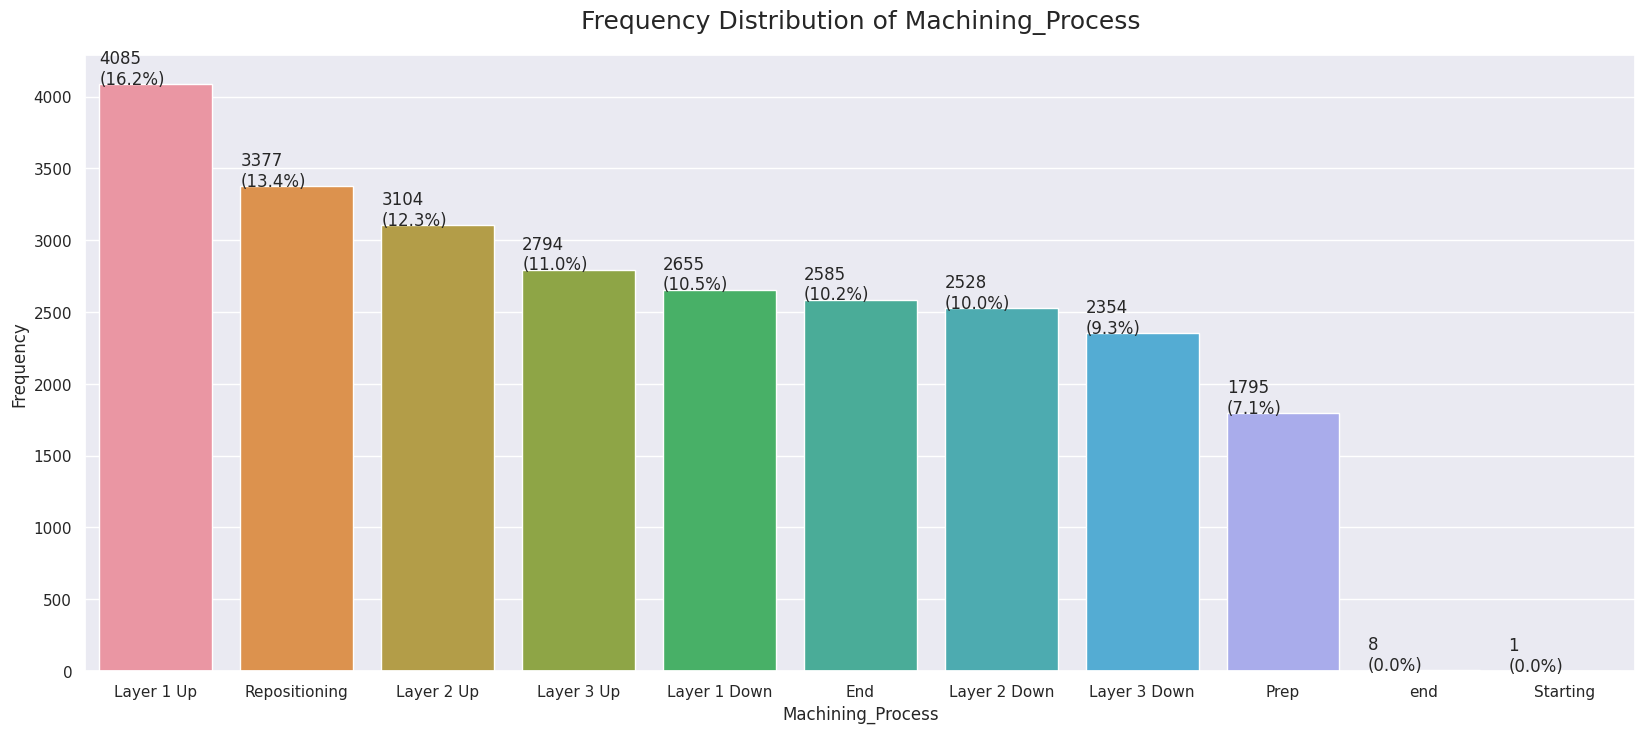

In [14]:
cat_dist(df=all_exp_data,var_name='Machining_Process',cat_limit=15)

In [15]:
all_exp_data = all_exp_data.loc[all_exp_data['Machining_Process']!='Starting']
all_exp_data['Machining_Process'] = all_exp_data['Machining_Process'].str.lower()

<ipython-input-15-2324f17b7b54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_exp_data['Machining_Process'] = all_exp_data['Machining_Process'].str.lower()


In [16]:
# One-hot Encoding this categorical variable to a numerical variable
from sklearn.preprocessing import OneHotEncoder
# Create an instance of One-hot-encoder and droppng the one category
enc = OneHotEncoder(drop='first')
#We are transforming the Categorical data in the next step using fit_transform
enc_data = pd.DataFrame(enc.fit_transform(all_exp_data[['Machining_Process']]).toarray())
#Getting the names of the columns after encoding
one_hot_cols = list(enc.get_feature_names_out())
one_hot_cols = [x.replace(" ","_") for x in one_hot_cols]
enc_data.columns = one_hot_cols
# Combining the encoded data with the original dataframe for using in the model
all_exp_data = all_exp_data.join(enc_data)

In [17]:
all_exp_data.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,Machining_Process_layer_1_down,Machining_Process_layer_1_up,Machining_Process_layer_2_down,Machining_Process_layer_2_up,Machining_Process_layer_3_down,Machining_Process_layer_3_up,Machining_Process_prep,Machining_Process_repositioning
0,141.0,-0.200,-100.0,141.0,0.0,0.0,-2.450,0.0512,327.0,2.69,0.000030,96.6,6.05,-75.0,96.7,6.0,0.0,2.72,0.0578,326.0,12.7,0.000714,29.7,0.025,6.25,29.7,0.0,0.0,0.0,0.0,0.0,0.0,-1540.0,53.4,45.30,-1540.0,53.3,0.000000e+00,18.7,0.765,323.0,115.0,0.145,12.0,1.0,2.0,6.0,prep,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,141.0,-0.300,-144.0,141.0,0.0,0.0,-1.400,0.0479,327.0,3.18,0.000014,97.2,6.28,18.8,97.3,6.0,0.0,2.93,0.0756,326.0,12.4,0.000893,29.7,0.025,12.50,29.7,0.0,0.0,0.0,0.0,0.0,0.0,-1530.0,53.3,11.90,-1530.0,53.3,0.000000e+00,24.8,1.000,322.0,117.0,0.193,12.0,1.0,26.0,6.0,prep,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,141.0,-0.250,-131.0,141.0,0.0,0.0,-2.290,0.0483,327.0,2.10,0.000015,97.8,6.10,68.7,97.9,6.0,0.0,4.96,0.1080,325.0,14.0,0.001380,29.7,0.025,12.50,29.7,0.0,0.0,0.0,0.0,0.0,0.0,-1530.0,53.4,14.10,-1530.0,53.3,0.000000e+00,17.8,0.881,323.0,114.0,0.170,12.0,1.0,26.0,6.0,prep,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,141.0,-0.175,-93.7,141.0,0.0,0.0,-0.851,0.0488,327.0,4.08,0.000007,98.4,5.97,-12.5,98.5,6.0,0.0,5.71,0.1140,326.0,14.8,0.001470,29.7,-0.025,-6.25,29.7,0.0,0.0,0.0,0.0,0.0,0.0,-1520.0,53.3,-16.10,-1520.0,53.3,9.540000e-07,21.5,0.751,323.0,117.0,0.144,12.0,1.0,26.0,6.0,prep,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,141.0,-0.200,-106.0,141.0,0.0,0.0,-2.290,0.0502,327.0,2.17,0.000015,99.0,5.93,-75.0,99.1,6.0,0.0,6.06,0.1080,325.0,14.5,0.001300,29.7,0.000,0.00,29.7,0.0,0.0,0.0,0.0,0.0,0.0,-1520.0,53.3,-7.06,-1520.0,53.3,-9.540000e-07,21.6,0.989,322.0,115.0,0.190,12.0,1.0,26.0,6.0,prep,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
all_exp_data.drop(['Machining_Process'], inplace=True, axis=1)

In [19]:
# Continuous variable distributions using histograms
def show_distribution(df=None,variable_name='',
                      pctl = [1, 10, 20, 25, 30 , 33, 40 , 50 , 60 , 67, 70, 75, 80 , 90 , 99],
                      plot= True, bins = 50,
                      decimals_ = 2):
    '''
    This function shows the distribution (Histogram plot) of any variable and returns some important percentile values of the variable
    Parameters:
        df            : The pandas dataframe that contains this variable data
        varaible_name : String, Name of the variable for which the distribution should be shown
        pctl          : List of Percentile values that should be returned (1 to 100 in multiples of 1)
        plot          : Boolean, Default True; Will plot a histogram if set to True
        bins          : The number of bins into which the data should be plotted on the histogram
        decimals_     : # of decimals shown for the varaible
    '''
    percentil = df[variable_name].quantile(np.linspace(.01, 1, 99, 0), 'lower')
    op = percentil.to_frame().reset_index()
    op.index = op.index+1.
    op = op[op.index.isin(pctl)]
    op.rename(columns = {'index': 'Percentile'},inplace=True)
    op.loc[len(op.index)] = [0, df[variable_name].min()]
    op.loc[len(op.index)] = [1, df[variable_name].max()]
    op['Percentile'] = 'p_'+ (op['Percentile']*100).astype(int).astype(str).str.zfill(2)
    op.loc[len(op.index)] = ['AVG', df[variable_name].mean()]
    op.sort_values(by=[variable_name,'Percentile'],inplace = True)
    op.reset_index(inplace=True,drop=True)
    op[variable_name] = op[variable_name].round(decimals_)
    if plot == True:
        plt.figure(figsize = (20,8))
        sns.histplot(x=df[variable_name], bins = bins, kde= True)
    return op

,Percentile,X1_ActualPosition
0,p_00,141.00
1,p_01,141.00
2,p_10,141.00
3,p_20,143.00
4,p_25,145.00
5,p_30,146.00
6,p_33,147.00
7,p_40,150.00
8,p_50,153.00
9,p_60,157.00


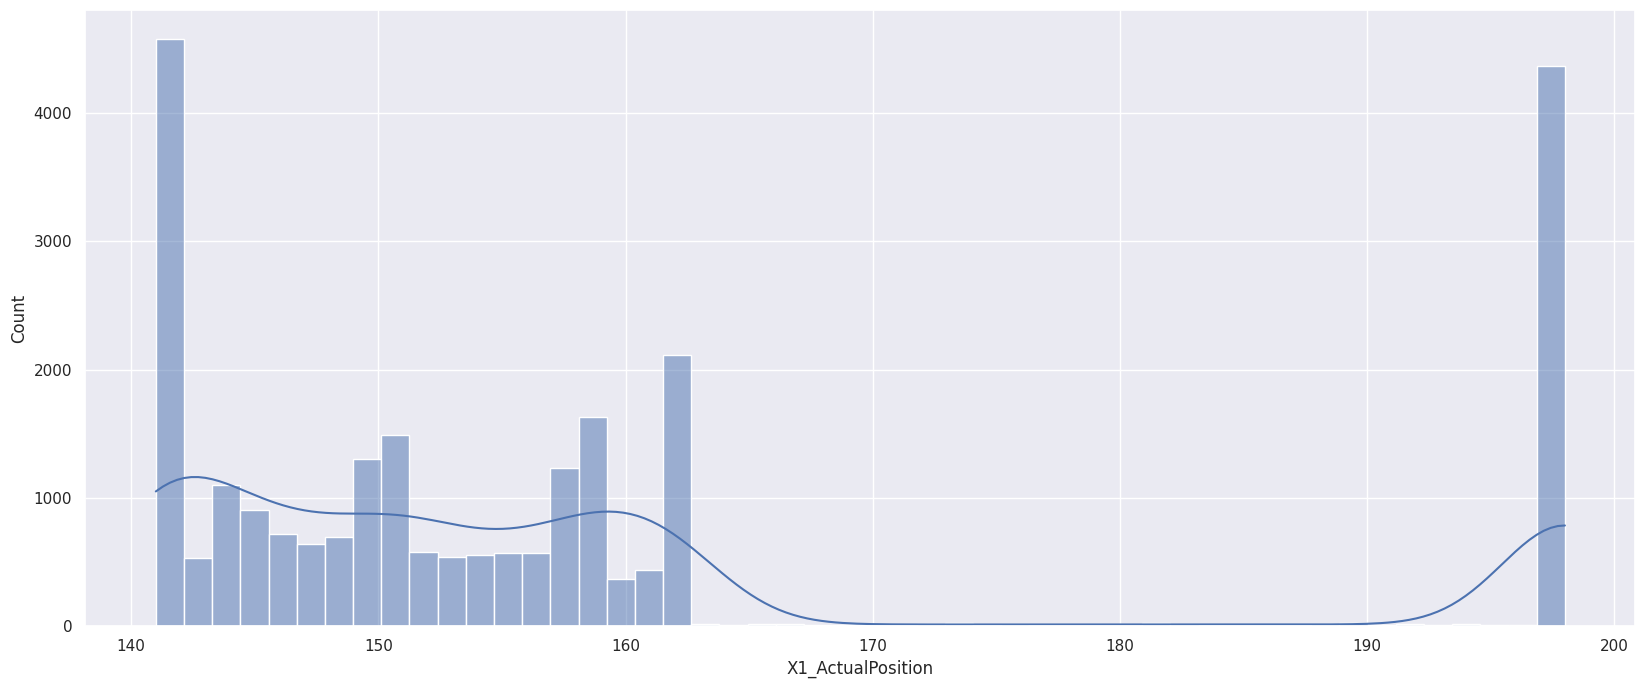

In [20]:
show_distribution(df=all_exp_data,variable_name='X1_ActualPosition')

In [21]:
1/0

ZeroDivisionError: ignored

## 3. Model Training & Selection

## 4. Model Evaluation

## 5. Hyperparameter Tuning

## 6. Production Deployment : Serving the model

Once the model is created we will save the same as an artifact and serve the model on the production systems. Things to remember while deploying you model in production:
- All feature transformations should also be saved as artifacts that can be used in production
- In end-point systems, epecially user facing systems, latency will be critical to user-experience, hence the total lag for collecting data from various sources and predicting the model result should be very minimal, usually in ms. In order to acheive this pleasant UX we need to ensure that such low latency systems have only the best and most necessary features incorporated into the model.
- End-point systems could also have very limited compute, which means the model needs to work well enough on very limited compute. Example: delpoyig a LLM on a mobile device for next word prediction is not feasible on current computing capabilities.


Now, let's save the artifacts developed above and use the same to make a prediction for tool wear.

In [ ]:
# # Saving the model
# #importing the library to save the model
# import joblib
# # save the transformer to a file
# joblib.dump(reg, 'transformer.joblib')
# # save the model to a file
# joblib.dump(reg, 'model.joblib')

In [ ]:
# # Predicting using this saved model

# # First we load the saved model
# tfr = joblib.load('transformer.joblib')
# predictor = joblib.load('model.joblib')

# # Creating a function to predict the output for a given set of inputs
# def tool_wear_predictor(input_data):
#   '''
#   This function predicts the tool wear given an array of inputs in the correct format
#   It also prints the given input and transformed input
#   '''
#   transformed_input = tfr(input_data)
#   prediction = predictor.predict(transformed_input)
#   print('Input Data : ',input)
#   print('Transformed Input : ',transformed_input)
#   return(prediction)

In [ ]:
# # Making a prediction on any given data
# input_data = [1,2,3,4,5,6]
# print('Model Output : 'tool_wear_predictor(input_data))

In [ ]:
# # Another example of a prediction on any given data
# input_data = [1,2,3,4,5,6]
# print('Model Output : 'tool_wear_predictor(input_data))

## 7. Pipeline Monitoring & Maintenance


* Before the model is deployed into production, there should be ample test-cases that should be deployed and alerts should be set-up at all important points of failure.
  * For example, say we are expecting 100-120 units to be manufactured per hour in an assembly line
  * We notice that the output is less than 80, this should send out an alert to monitor for potential failure
  * Or if the unit is producing say 150 units an hour, this hsould also be alerted. These checks could really help with the QA/QC in the manufacturing process
  * Such checks should be set-up where ever possible in order to reduce losses   
* Once the model is deployed in production, quality of the output should be checked at regular intervals and the model should also be refreshed with new available training data in order to capture more cases of Tool Wear and improve the prediction accuracy



## Summary


*   In summary we are now able to predict the tool wear using the CNC Milling dataset.
*   We can now apply similar ML techniques to the one that we have learnt today to various problems in different field of engineering.
* We have learnt to import the data, clean it and build a model to predict tool wear based on the historical data.
* We have also learnt to save the model and predict tool wear based on new incoming data using the above model.



## THANK YOU!